# Hyper Spectral Image Classification

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.io import loadmat
import plotly.express as px
from sklearn.svm import SVC
import scipy.io as sio
import seaborn as sn
import pandas as pd
import numpy as np
import random
import os

In [2]:
def read_HSI():
  X = loadmat('C:/Users/Gopal/Desktop/Datasets/HSI/Salinas_corrected.mat')['salinas_corrected']
  y = loadmat('C:/Users/Gopal/Desktop/Datasets/HSI/Salinas_gt.mat')['salinas_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

#x and y (512*512)size 
X, y = read_HSI()

X shape: (512, 217, 204)
y shape: (512, 217)


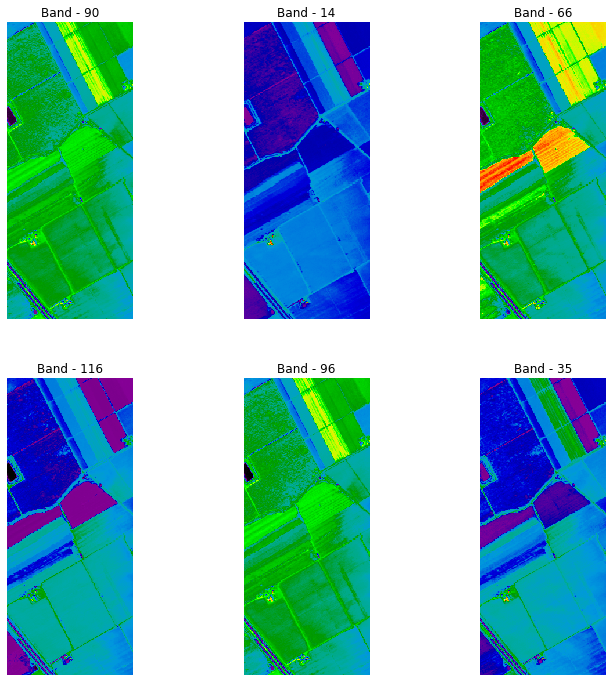

In [5]:
#Spectral 6 Band

fig = plt.figure(figsize =(12,12))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap= 'nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

In [6]:
#Extracting pixels Bands into csv file.

def extract_pixels(X, y):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(data = q)
    df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
    df.columns=[f'BAND-1' for i in range(i, i+X.shape[2])]+['class']
    df.to_csv('DATASET.csv')
    return df
    
df = extract_pixels(X, y)

salinas = pd.read_csv('DATASET.csv')

In [7]:
df.head()

,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,...,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,83,105,83,48,75,50,24,9,17,0


In [8]:
#df.info()

In [9]:
df.iloc[:, :-1].describe()

,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,...,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1,BAND-1
count,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,...,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000
mean,372.181929,480.388321,693.751287,1156.562923,1462.129950,1533.406025,1473.193944,1634.795552,1866.721801,1930.824417,...,132.158959,116.093219,138.739181,117.048180,71.937059,104.474825,71.262025,39.304778,14.063463,22.294175
std,62.453906,80.614130,103.217542,170.676450,227.876068,260.417860,271.714302,329.998481,404.351771,445.485781,...,71.227778,63.216203,76.108928,65.012702,40.255958,59.222728,41.232828,23.280864,9.088472,13.735217
min,87.000000,86.000000,90.000000,86.000000,91.000000,91.000000,88.000000,88.000000,87.000000,86.000000,...,-3.000000,-6.000000,-2.000000,-7.000000,-5.000000,-3.000000,-6.000000,-9.000000,-8.000000,-11.000000
25%,308.000000,404.000000,604.000000,1005.000000,1260.000000,1305.000000,1240.000000,1348.000000,1514.000000,1540.000000,...,64.000000,55.000000,65.000000,55.000000,33.000000,47.000000,32.000000,18.000000,7.000000,10.000000
50%,372.000000,482.000000,721.000000,1174.000000,1496.000000,1560.000000,1512.000000,1691.000000,1936.000000,2007.000000,...,143.000000,126.000000,150.000000,127.000000,78.000000,113.000000,76.000000,42.000000,15.000000,23.000000
75%,435.000000,558.000000,745.000000,1267.000000,1617.000000,1715.000000,1664.000000,1873.000000,2157.000000,2255.000000,...,197.000000,174.000000,209.000000,177.000000,109.000000,159.000000,108.000000,60.000000,21.000000,33.000000
max,814.000000,1165.000000,1920.000000,3865.000000,5153.000000,5614.000000,5663.000000,6599.000000,7748.000000,8209.000000,...,569.000000,504.000000,608.000000,523.000000,596.000000,693.000000,745.000000,765.000000,777.000000,775.000000


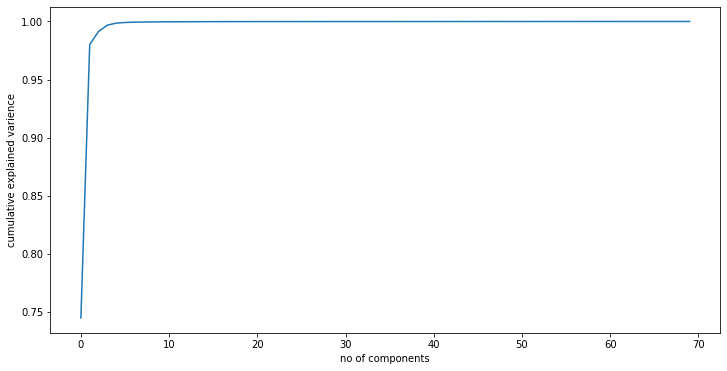

In [10]:
#Principal Component Analysis (for feature extraction Method)

pca = PCA(n_components = 70)
principalcomponents = pca.fit_transform(df.iloc[:, :-1].values)
ev=pca.explained_variance_ratio_

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(ev))
plt.xlabel('no of components')
plt.ylabel('cumulative explained varience')

plt.show()

In [11]:
#Total 40 PCA

pca = PCA(n_components = 40)

dt = pca.fit_transform(df.iloc[:, :-1].values)

q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)

q.columns = [f'PC-{i}' for i in range(1,41)]+['class']

In [12]:
#Show Top 5

q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,-6136.415770,-4385.651601,628.426690,-302.089387,-7.164320,48.222012,-129.801973,-28.045863,31.953506,69.756525,...,14.505303,4.323393,2.056796,-21.153969,-8.465843,-5.417323,5.024746,9.089763,11.940663,0
1,-6196.986718,-4360.590266,568.289463,-269.925094,-1.914969,-13.422141,-141.516132,-48.425747,56.946711,62.859662,...,2.885577,3.759506,0.571922,2.450240,-0.706521,-10.377231,-1.914349,1.349593,1.490213,0
2,-6359.538817,-4693.892811,578.047775,-286.413937,18.366365,-17.493501,-122.449201,-23.107800,27.357094,64.968584,...,7.205293,-5.611508,-10.409034,-2.901157,-11.685514,-1.149407,10.996496,0.447841,7.987437,0
3,-6583.700658,-5103.974489,630.466845,-313.787607,39.673922,-9.386642,-130.574810,-14.943107,24.519472,63.060404,...,-10.310086,-6.337611,-6.800296,6.011813,-0.046254,-0.295705,9.006137,1.655665,5.042975,0
4,-6834.644650,-5385.604040,666.876042,-327.332038,24.787586,-19.604360,-134.531359,-30.850479,28.726584,83.725080,...,-11.402436,3.930893,19.168379,-2.791542,-4.143877,-0.268668,-5.723684,-10.165515,-23.145941,0


In [11]:
q.to_csv('IP_40_PCA.csv', index=False)

# Model

In [12]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow','Fallow_rough_plow','Fallow_smooth','Stubble','Celery','Grapes_untrained','Soil_vinyard_develop','Corn_senesced_green_weeds','Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk','Lettuce_romaine_7wk','Vinyard_untrained','Vinyard_vertical_trellis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

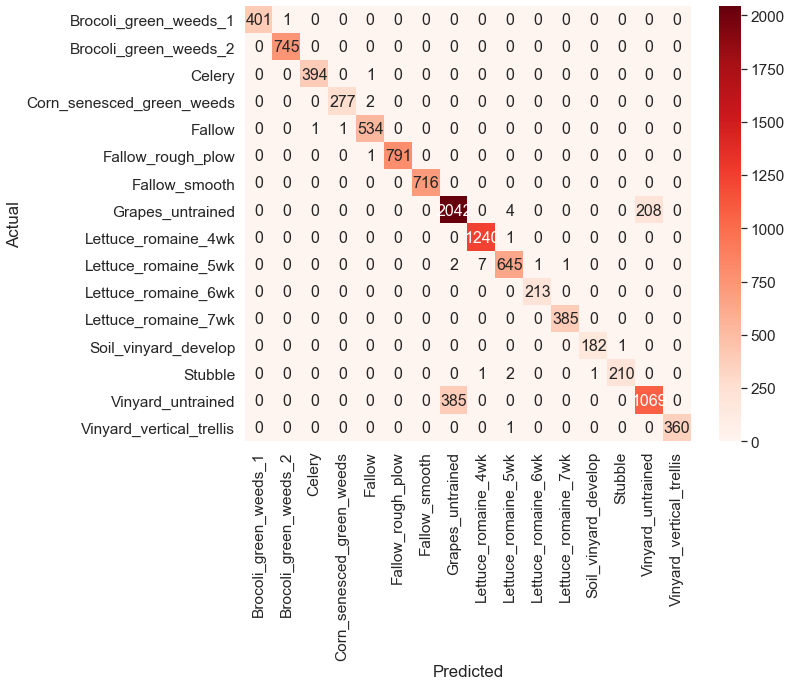

In [13]:
data = confusion_matrix(y_test, ypred)

df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))

df_cm.index.name = 'Actual'

df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,8))

sn.set(font_scale=1.4)#for label size

sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [14]:
print(classification_report(y_test, ypred, target_names = names))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      1.00      1.00       402
    Brocoli_green_weeds_2       1.00      1.00      1.00       745
                   Fallow       1.00      1.00      1.00       395
        Fallow_rough_plow       1.00      0.99      0.99       279
            Fallow_smooth       0.99      1.00      0.99       536
                  Stubble       1.00      1.00      1.00       792
                   Celery       1.00      1.00      1.00       716
         Grapes_untrained       0.84      0.91      0.87      2254
     Soil_vinyard_develop       0.99      1.00      1.00      1241
Corn_senesced_green_weeds       0.99      0.98      0.99       656
      Lettuce_romaine_4wk       1.00      1.00      1.00       213
      Lettuce_romaine_5wk       1.00      1.00      1.00       385
      Lettuce_romaine_6wk       0.99      0.99      0.99       183
      Lettuce_romaine_7wk       1.00      0.98      0.99     

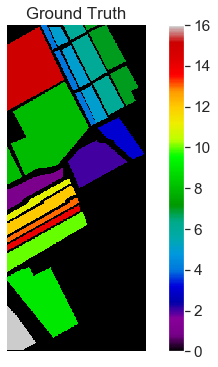

In [15]:
#Ground Truth
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((512, 217)), cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [17]:
#prediction 
l=[]
for i in range(q.shape[0]):
    if q.iloc[i, 1] == 0:
        l.apend(0)
    else:
        l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

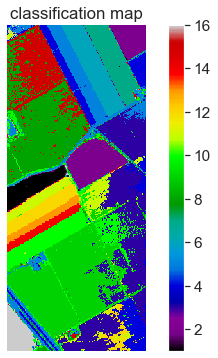

In [19]:
#CLassified Image
clmap = np.array(l).reshape((512, 217)).astype('float')
plt.figure(figsize=(8, 6))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.title('classification map')
plt.savefig('classification.png')
plt.show()